<파이썬 머신러닝 완벽 가이드 개정 2판> 8장 p. 488 ~ 508

# CHAPTER 08. 텍스트 분석
---
### 08-01. 텍스트 분석의 이해
- 텍스트 분석 수행 프로세스
- 파이썬 기반의 NLP, 텍스트 분석 패키지

### 08-02. 텍스트 사전 준비 작업(텍스트 전처리) - 텍스트 정규화
- 클렌징
- 텍스트 토큰화
   - 문자 토큰화
   - 단어 토큰화
- 스톱 워드 제거
- Stemming and Lemmatization

### 08-03. Bag of words - BOW
- BOW 피처 벡터화
- 사이킷런의 Count 및 TF-IDF 벡터화 구현 : CountVectorizer, TfidfVectorizer
- BOW 벡터화를 위한 희소 행렬
- 희소 행렬
   - COO 형식
   - CSR 형식
   
---

### 08-01. 텍스트 분석의 이해
- 텍스트 마이닝(Text Mining)이라고도 부름.
- NLP: 언어를 해석하기 위한 기계 번역, 자동으로 질문을 해석하고 답을 해주는 질의응답 시스템. NLP 기술이 발전함에 따라 텍스트 분석이 더욱 정교해짐.
- 텍스트 분석의 기술 영역
   - 텍스트 분류(Text Classification): 문서가 특정 카테고리에 속하는 것을 예측. 지도학습
   - 감성 분석(Sentiment Analysis): 감정/판단/믿음/의견/기분 등 주관적인 요소를 분석. 지도학습, 비지도학습.
   - 텍스트 요약(Summarization): 주제, 중심 사상 추출
   - 텍스트 군집화(Clustering)와 유사도 측정: 문서의 유형에 대해 군집화. 비지도학습.
- 텍스트는 비정형 데이터. 머신러닝에선 비정형 텍스트 데이터를 어떻게 피처 형태로 추출하고 추출된 피처에 의미 있는 값을 부여하는가 하는 것이 매우 중요한 요소.
- 피처 벡터화: word(또는 word의 일부분) 기반의 다수의 피처로 추출하고 이 피처에 단어 빈도수와 같은 숫자 값을 부여하면 텍스트는 단어의 조합인 벡터값으로 표현피처 벡터화 방법
   - BOW(Bag of Words)
   - Word2Vec
   

- **텍스트 분석 수행 프로세스**
   - Step 1: 텍스트 전처리: 대/소문자 변경, 특수문자 삭제, 단어(Word)의 토큰화 작업, 의미 없는 단어(Stop word) 제거, 어근 추출(Stemming/Lemmatization), 텍스트 정규화 작업
   - Step 2: 피처 벡터화/추출: BOW(Count 기반, TF-IDF 기반 벡터화), Word2Vec
   - Step 3: ML 모델 수립 및 학습/예측/평가
   

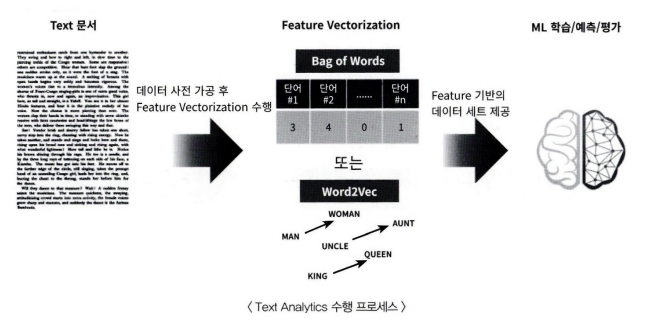

- **파이썬 기반의 NLP, 텍스트 분석 패키지**
   - 사이킷런으로 텍스트를 일정 수준으로 가공하고 머신러닝 알고리즘에 텍스트 데이터를 피처로 처리하는 것 가능.
   - 더 다양한 텍스트 분석이 적용돼야 하는 경우 NLP 전용 패키지
      - NLTK / Gensim / SpaCy
      


### 08-02. 텍스트 사전 준비 작업(텍스트 전처리) - 텍스트 정규화
텍스트 정규화: 텍스트를 머신러닝 알고리즘이나 NLP 애플리케이션에 입력 데이터로 사용하기 위해 클렌징, 정제, 토큰화, 어근화 등의 다양한 텍스트 데이터의 사전 작업을 수행하는 것


####**클렌징**
클렌징: 텍스트 분석에 방해가 되는 불필요한 문자와 기호(HTML, XML 태그)를 제거하는 작업


####**텍스트 토큰화**

토큰화(tokenization): 텍스트를 작은 단위로 나누는 전처리 기술
   - 문장 토큰화(Sentence tokenization)
      - 문장 토큰화: 문장의 마침표(.), 개행문자(\n) 등 문장의 마지막을 뜻하는 기호에 따라 문서를 문장으로 분리하는 작업
      - from nltk import sent_tokenize는 list 객체를 반환.


   - 단어 토큰화(Word tokenization)
      - 단어 토큰화: 공백, 콤마(,),마침표(.), 개행문자 등으로 문장을 단어로 토큰화
      - from nltk import word_tokenize는 list 객체를 반환.
      - 문장의 문맥적인 의미가 무시되는 문제 -> n개의 단어를 하나의 토큰화 단위로 분리해 내는 n-gram

In [4]:
# nltk.download('punkt)로 마침표, 개행 문자등의 데이터 세트를 다운로드
from nltk import sent_tokenize
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

text_sample = 'The Matrix is everywhere its all around us, here even in this room. You can see it out your window or on your television. You feel it when you go to work, or go to church or pay your taxes.'
sentences = sent_tokenize(text=text_sample)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [5]:
# sent_tokenize()는 list 객체를 반환
print(type(sentences), len(sentences))
print(sentences)

<class 'list'> 3
['The Matrix is everywhere its all around us, here even in this room.', 'You can see it out your window or on your television.', 'You feel it when you go to work, or go to church or pay your taxes.']


In [6]:
# word_tokenize()를 사용해 단어로 토큰화
from nltk import word_tokenize

sentence = 'The Matrix is everywhere its all around us, here even in this room.'
words = word_tokenize(sentence)
print(type(words), len(words))
print(words)

<class 'list'> 15
['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.']


In [7]:
from nltk import word_tokenize, sent_tokenize

# 여러 개의 문장으로 된 입력 데이터를 문장별로 단어 토큰화하게 만드는 함수 생성
def tokenize_text(text):
  # 문장별로 분리 토큰
  sentences = sent_tokenize(text)
  # 분리된 문장별 단어 토큰화
  word_tokens = [word_tokenize(sentence) for sentence in sentences]
  return word_tokens

# 여러 문장에 대해 문장별 단어 토큰화 수행
## 3개의 리스트 객체를 내포하는 리스트
word_tokens = tokenize_text(text_sample)
print(type(word_tokens), len(word_tokens))
print(word_tokens)

<class 'list'> 3
[['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.'], ['You', 'can', 'see', 'it', 'out', 'your', 'window', 'or', 'on', 'your', 'television', '.'], ['You', 'feel', 'it', 'when', 'you', 'go', 'to', 'work', ',', 'or', 'go', 'to', 'church', 'or', 'pay', 'your', 'taxes', '.']]


####**스톱 워드 제거**
- 스톱 워드(Stop word): 문장을 구성하는 필수 문법 요소지만 문맥적으로 큰 의미가 없는 단어. (ex) is, the, a, will.
- NLTK에 다양한 언어의 스톱 워드를 제공
   - nltk.corpus.stopwords.words('english')

In [8]:
# NLTK의 stopwords 목록을 내려받기
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [9]:
# 영어엔 몇 개의 stop words가 있는지 확인
print('영어 stop words 개수:', len(nltk.corpus.stopwords.words('english')))
print(nltk.corpus.stopwords.words('english')[:20])

영어 stop words 개수: 198
['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been']


In [10]:
# 위 예제 word_tokens 리스트에 대해 stopwords를 필터링으로 제거
import nltk

stopwords = nltk.corpus.stopwords.words('english')
all_tokens = []

# 위 예재에서 3개의 문장별로 얻은 words_tokens list에 대해 stop words를 제거하는 반복문
for sentence in word_tokens:
  filtered_words = []
  # 개별 문장별로 토큰화된 문장 list에 대해 stop word를 제거하는 반복문
  for word in sentence:
    # 소문자로 모두 변환
    word = word.lower()
    # 토큰화된 개별 단어가 stop word에 포함되지 않으면 word_tokens에 추가
    if word not in stopwords:
      filtered_words.append(word)
  all_tokens.append(filtered_words)

print(all_tokens)

[['matrix', 'everywhere', 'around', 'us', ',', 'even', 'room', '.'], ['see', 'window', 'television', '.'], ['feel', 'go', 'work', ',', 'go', 'church', 'pay', 'taxes', '.']]


####**Stemming and Lemmatization**
Stemming and Lemmatization: 문법적 또는 의미적으로 변화하는 단어의 원형을 찾는 작업
- Lemmatization이 stemming보다 정교하며 의미론적인 기반에서 단어의 원형을 찾음. Lemmatization이 Stemming보다 변환에 더 오랜 시간
을 필요로 함.
   - Lemmatization: 문법적인 요소(예: 품사)와 더 의미적인 부분을 감안
   - Stemming: 원래 단어에서 일부 철자가 훼손된 어근 단어를 추출하는 경향
- NLTK 제공
   - Lemmatizer: WordNetLemmatizer
   - Stemmer: Porter, Lancaster, Snowball Stemmer
   - nltk.stem 임포트 후 객체 생성, 객체의 메서드 호출




In [15]:
# LancasterStemmer를 사용한 단어의 stemming
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()

print(stemmer.stem('working'), stemmer.stem('works'), stemmer.stem('worked'))
print(stemmer.stem('amusing'), stemmer.stem('amuses'), stemmer.stem('amused'))
print(stemmer.stem('happier'), stemmer.stem('happiest'))
print(stemmer.stem('fancier'), stemmer.stem('fanciest'))

work work work
amus amus amus
happy happiest
fant fanciest


In [16]:
# WordNetLemmatizer를 사용한 단어의 lemmatization. 단어의 ‘품사’를 입력.
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

lemma = WordNetLemmatizer()
print(lemma.lemmatize('amusing', 'v'), lemma.lemmatize('amuses', 'v'), lemma.lemmatize('amused', 'v'))
print(lemma.lemmatize('happier', 'v'), lemma.lemmatize('happiest', 'v'))
print(lemma.lemmatize('fancier', 'v'), lemma.lemmatize('fanciest', 'v'))

[nltk_data] Downloading package wordnet to /root/nltk_data...


amuse amuse amuse
happier happiest
fancier fanciest


### 08-03. Bag of words - BOW
 Bag of words 모델: 문서가 가지는 모든 단어(Words)를 문맥이나 순서를 무시하고 **일괄적으로 단어에 대해 빈도 값을 부여**해 피처 값을 추출하는 모델
 - 장점
    - 단순히 단어의 발생 횟수에 기반하고 있지만, 예상보
다 문서의 특징을 잘 나타낼 수 있음.
    -  쉽고 빠른 구축

- 단점
   - 문맥 의미(Semantic Context) 반영 부족
      - 보완하기 위해 n_gram 기법을 활용
   - 희소 행렬 문제(희소성, 희소 행렬)
      - 희소 행렬(Sparse Matrix): 대부분의 값이 0으로 채워자는 행렬
      - 밀집 행렬(Dense Matrix): 대부분의 값이 0이 아닌 의미 있는 값으로 채워져 있는 행렬
      - 희소 행렬은 ML 알고리즘의 수행 시간과 예측 성능을 떨어뜨림.

**BOW 피처 벡터화**

M개의 텍스트 문서, 이 문서에서 모든 단어를 추출해 나열했을 때 N개의 단어가 있다고 가정하면 BOW 피처 벡터화 이후 M x N개의 단어 피처로 이뤄진 행렬로 변환

- 카운트 기반의 벡터화: 단어 피처에 값을 부여할 때 각 문서에서 해당 단어가 나타나는 횟수, 즉 Count를 부여
- TF-IDF(Term Frequency - Inverse Document Frequency) 기반의 벡터화: 개별 문서에서 자주
나타나는 단어에 높은 가중치를 주되, 모든 문서에서 전반적으로 자주 나타나는 단어에 대해서는 페널
티를 주는 방식으로 값을 부여



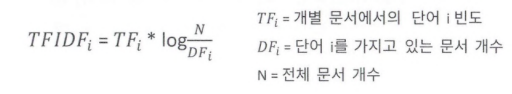

**사이킷런의 Count 및 TF-IDF 벡터화 구현 : CountVectorizer, TfidfVectorizer**

- 단지 피처 벡터화만 수행하지는 않으며 소문자 일괄 변환, 토큰화, 스톱 워드 필터링 등의 텍스트 전처리도 함께 수행
- CountVectorizer의 입력 파라미터
   - max df, min_df, max features: 토큰화된 단어를 피처로 추출하고 단어 빈도수 벡터 값을 적용
   - stop_words
   - n_gram_range
   - analyzer
   - token_pattern
   - tokenizer: tokenizer 파라미터에 커스텀 어근 변환 함수를 적용하여 어근 변환을 수행 가능 (Stemming과 Lemmatization같은 어근 변환은 CountVectorizer에서 직접 지원하진 않음.)


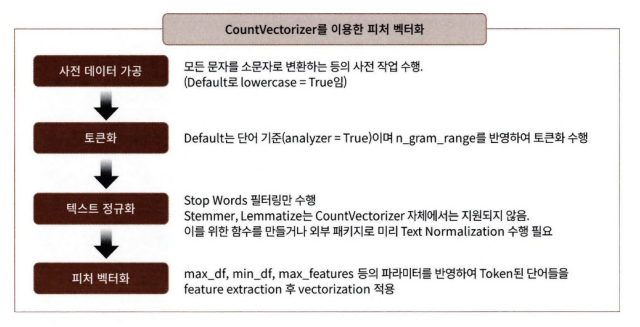

**BOW 벡터화를 위한 희소 행렬**

- 모든 문서에 있는 단어를 추출해 이를 피처로 벡터화하는 방법은 필연적으로 많은 피처 칼럼을 만들 수
밖에 없음.
- 희소 행렬은 너무 많은 불필요한 0 값이 메모리 공간에 할당되어 메모리 공간이 많이 필요하며, 행
렬의 크기가 커서 연산 시에도 데이터 액세스를 위한 시간이 많이 소모됨.
- 희소 행렬을 물리적으로 적은 메모리 공간을 차지할 수 있도록 변환하는 방법
   - COO 형식
   - CSR 형식
   - 사이파이(Scipy)의 sparse 패키지를 이용

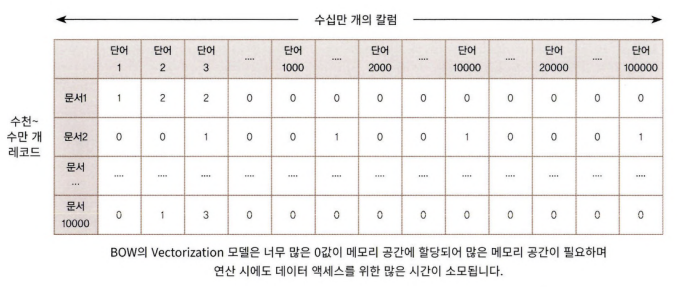

- **COO 형식**
   - COO(Coordinate： 좌표)
   - 0이 아닌 데이터만 별도의 데이터 배열(Array)에 저장하고, 그 데이터가 가리키는 행과 열의 위치를 별도의 배열로 저장


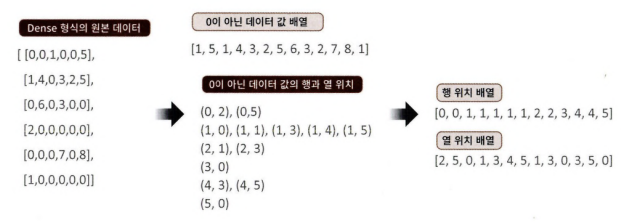

In [9]:
import numpy as np

dense = np.array([[3, 0, 1],[0, 2, 0]])
print(dense)

[[3 0 1]
 [0 2 0]]


In [7]:
#  [[3, 0, 1], [0, 2, 0]]를 사이파이의 coo_matrix 클래스를 이용해 COO 형식의 희소 행렬로 변환
from scipy import sparse

# 0이 아닌 데이터 추출
data = np.array([3, 1, 2])

# 행 위치와 열 위치를 각각 배열로 생성
row_pos = np.array([0, 0, 1])
col_pos = np.array([0, 2, 1])

# sparse 패키지의 coo_matrix를 이용해 COO 형식으로 희소 행렬 생성
sparse_coo = sparse.coo_matrix((data, (row_pos, col_pos)))

In [8]:
# sparse_coo는 COO 형식의 희소 행렬 객체 변수
sparse_coo.toarray()

array([[3, 0, 1],
       [0, 2, 0]])

- **CSR 형식**
   - CSR(Compressed Sparse Row)
   - 행 위치 배열 내에 있는 고유한 값의 시작 위치만 다시 별도의 위치 배열로 가지는 변환 방식
   - 고유 값의 시작 위치만 알고 있으면 얼마든지 행 위치
배열을 다시 만들 수 있음.

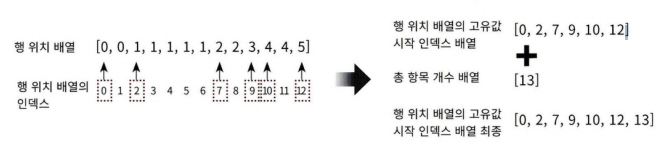

In [11]:
from scipy import sparse

dense2 = np.array([[0, 0, 1, 0, 0, 5],
                   [1, 4, 0, 3, 2, 5],
                   [0, 6, 0, 3, 0, 0],
                   [0, 0, 0, 7, 0, 8],
                   [1, 0, 0, 0, 0, 0]])
print(dense2)

[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]


In [13]:
# 0이 아닌 데이터 추출
data2 = np.array([1, 5, 1, 4, 3, 2, 5, 6, 3, 2, 7, 8, 1])

# 행 위치와 열 위치를 각각 array로 생성
row_pos = np.array([0, 0, 1, 1, 1, 1, 1, 2, 2, 3, 4, 4, 5])
col_pos = np.array([2, 5, 0, 1, 3, 4, 5, 1, 3, 0, 3, 5, 0])

# COO 형식으로 변환
sparse_coo = sparse.coo_matrix((data2, (row_pos, col_pos)))

# 행 위치 배열의 고유한 값의 시작 위치 인덱스를 배열로 생성
row_pos_ind = np.array([0, 2, 7, 9, 10, 12, 13])

# CSR 형식으로 변환
sparse_csr = sparse.csr_matrix((data2, col_pos, row_pos_ind))

In [15]:
print('COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_coo.toarray())
print('CSR 변환된 데이터가 제대로 되었는디 다시 Dense로 출력 확인')
print(sparse_csr.toarray())

COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]
CSR 변환된 데이터가 제대로 되었는디 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]
